In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [88]:
# loading dataset
data = []
labels = []
classes = 43 # there are 43 classes

In [90]:
for i in range(classes):
    path = 'D:/Internship/Anemoi_Technologies/Training/Data/Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((32, 32))
            data.append(np.array(resize_image))
            labels.append(i)
        except:
            print("Error - Image loading")

D:/Internship/Anemoi_Technologies/Training/Data/Train/0
D:/Internship/Anemoi_Technologies/Training/Data/Train/1
D:/Internship/Anemoi_Technologies/Training/Data/Train/2
D:/Internship/Anemoi_Technologies/Training/Data/Train/3
D:/Internship/Anemoi_Technologies/Training/Data/Train/4
D:/Internship/Anemoi_Technologies/Training/Data/Train/5
D:/Internship/Anemoi_Technologies/Training/Data/Train/6
D:/Internship/Anemoi_Technologies/Training/Data/Train/7
D:/Internship/Anemoi_Technologies/Training/Data/Train/8
D:/Internship/Anemoi_Technologies/Training/Data/Train/9
D:/Internship/Anemoi_Technologies/Training/Data/Train/10
D:/Internship/Anemoi_Technologies/Training/Data/Train/11
D:/Internship/Anemoi_Technologies/Training/Data/Train/12
D:/Internship/Anemoi_Technologies/Training/Data/Train/13
D:/Internship/Anemoi_Technologies/Training/Data/Train/14
D:/Internship/Anemoi_Technologies/Training/Data/Train/15
D:/Internship/Anemoi_Technologies/Training/Data/Train/16
D:/Internship/Anemoi_Technologies/Trainin

In [91]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [92]:
print(data.shape, labels.shape)

(78418, 32, 32, 3) (78418,)


In [93]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: 
# for training data and for testing data. With this function, you don't need to divide the dataset manually. 
# By default, Sklearn train_test_split will make random partitions for the two subsets.
# arrays: Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
# test_size: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
    #If int, represents the absolute number of test samples. 
# random_state: Controls the shuffling applied to the data before applying the split. 
    #Pass an int for reproducible output across multiple function calls.     
    
X_train = X_train/255 
X_test = X_test/255    

In [94]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, 
# can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories 
# in the data.

In [95]:
#Building the model
model = Sequential() # A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. 
# It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it. We use the 'add()' function to add layers to our model. 
# We will add two layers and an output layer.

model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 3)))
# 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
# filters: Mandatory Conv2D parameter is the numbers of filters that convolutional layers will learn from.
#          It is an integer value and also determines the number of output filters in the convolution.
# Kernel: In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, 
#          edge detection, and more by doing a convolution between a kernel and an image.
# kernel-size: This parameter determines the dimensions of the kernel. Common dimensions include 1×1, 3×3, 5×5, and 7×7 which 
#         can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.
# padding: The padding parameter of the Keras Conv2D class can take one of two values: ‘valid’ or ‘same’.
#         Setting the value to “valid” parameter means that the input volume is not zero-padded and the spatial dimensions are 
#         allowed to reduce via the natural application of convolution.
# activation: The activation parameter to the Conv2D class is simply a convenience parameter which allows you to supply a
#         string, which specifies the name of the activation function you want to apply after performing the convolution.
# The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input 
# directly if it is positive, otherwise, it will output zero. The rectified linear activation function overcomes the vanishing \
# gradient problem, allowing models to learn faster and perform better.

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
# Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of 
# each feature map. The maximum pooling operation can be added to the worked example by adding the MaxPooling2D layer 
# provided by the Keras API
#pool_size: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) 
#           will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will 
#           be used for both dimensions.

model.add(Dropout(rate=0.25))
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps 
# prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
# rate: Float between 0 and 1. Fraction of the input units to drop.

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
# flatten is a method of an ndarray object and hence can only be called for true numpy arrays. 
# Flatten is used to flatten the input.

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
# The softmax function is used as the activation function in the output layer of neural network models that predict a 
# multinomial probability distribution. By definition, the softmax activation will output one value for each node in the 
# output layer.

In [96]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', 
              # The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
              # they perform reduction by default when used in a standalone way 
              optimizer='adam', 
              # An optimizer is one of the two arguments required for compiling a Keras model
              # Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
              metrics=['accuracy'])
              # A metric is a function that is used to judge the performance of your model.
              # Metric functions are similar to loss functions, except that the results from evaluating a metric are not used 
              # when training the model.

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)        

In [98]:
model.fit(X_train, y_train, batch_size=32, epochs=11, validation_data=(X_test, y_test))
# e main purpose of this fit function is used to evaluate your model on training.
# X, y − It is a tuple to evaluate your data.
# epochs − no of times the model is needed to be evaluated during training.
# batch_size − training instances.

Epoch 1/11
1961/1961 [==============================] - 105s 50ms/step - loss: 0.5052 - accuracy: 0.8559 - val_loss: 0.0413 - val_accuracy: 0.9885
Epoch 2/11
1961/1961 [==============================] - 91s 46ms/step - loss: 0.0704 - accuracy: 0.9784 - val_loss: 0.0252 - val_accuracy: 0.9922
Epoch 3/11
1961/1961 [==============================] - 93s 48ms/step - loss: 0.0495 - accuracy: 0.9856 - val_loss: 0.0238 - val_accuracy: 0.9929
Epoch 4/11
1961/1961 [==============================] - 92s 47ms/step - loss: 0.0418 - accuracy: 0.9875 - val_loss: 0.0057 - val_accuracy: 0.9980
Epoch 5/11
1961/1961 [==============================] - 91s 46ms/step - loss: 0.0339 - accuracy: 0.9905 - val_loss: 0.0101 - val_accuracy: 0.9967
Epoch 6/11
1961/1961 [==============================] - 88s 45ms/step - loss: 0.0304 - accuracy: 0.9913 - val_loss: 0.0059 - val_accuracy: 0.9976
Epoch 7/11
1961/1961 [==============================] - 88s 45ms/step - loss: 0.0310 - accuracy: 0.9920 - val_loss: 0.0045 

In [5]:
y_test=pd.read_csv("D:/Internship/Anemoi_Technologies/Training/Data/Test.csv")

In [6]:
labels_test = y_test['ClassId'].values #class id's of traffic signs
img_test = y_test['Path'].values #image path for traffic signs

In [7]:
# Classes of trafic signs
classes_dict = { 0:'Speed limit (20km/h)',
                 1:'Speed limit (30km/h)', 
                 2:'Speed limit (50km/h)', 
                 3:'Speed limit (60km/h)', 
                 4:'Speed limit (70km/h)', 
                 5:'Speed limit (80km/h)', 
                 6:'End of speed limit (80km/h)', 
                 7:'Speed limit (100km/h)', 
                 8:'Speed limit (120km/h)', 
                 9:'No passing', 
                 10:'No passing veh over 3.5 tons', 
                 11:'Right-of-way at intersection', 
                 12:'Priority road', 
                 13:'Yield', 
                 14:'Stop', 
                 15:'No vehicles', 
                 16:'Veh > 3.5 tons prohibited', 
                 17:'No entry', 
                 18:'General caution', 
                 19:'Dangerous curve left', 
                 20:'Dangerous curve right', 
                 21:'Double curve', 
                 22:'Bumpy road', 
                 23:'Slippery road', 
                 24:'Road narrows on the right', 
                 25:'Road work', 
                 26:'Traffic signals', 
                 27:'Pedestrians', 
                 28:'Children crossing', 
                 29:'Bicycles crossing', 
                 30:'Beware of ice/snow',
                 31:'Wild animals crossing', 
                 32:'End speed + passing limits', 
                 33:'Turn right ahead', 
                 34:'Turn left ahead', 
                 35:'Ahead only', 
                 36:'Go straight or right', 
                 37:'Go straight or left', 
                 38:'Keep right', 
                 39:'Keep left', 
                 40:'Roundabout mandatory', 
                 41:'End of no passing', 
                 42:'End no passing veh > 3.5 tons' }

(1, 32, 32, 3)
14


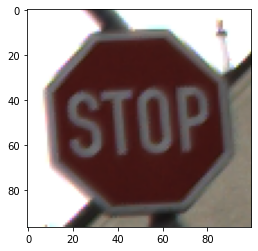

In [91]:
image = Image.open('D:/Internship/Anemoi_Technologies/Training/Data/' + img_test[93])
img = image.resize((32,32))
img = np.array(img)/255
img = img.reshape(1,32,32,3)
print(img.shape)
print(labels_test[93])
plt.imshow(image)

In [92]:
# Prediction of this image
pred = model.predict_classes(img)[0]
print(pred)

14


In [93]:
sign = classes_dict[pred]
print(sign)

Stop


In [108]:
data =[]

for img in img_test:
    try:
        image = cv2.imread('D:/Internship/Anemoi_Technologies/Training/Data/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((32, 32))
        data.append(np.array(resize_image))
    except:
        print("Error")

In [109]:
X_test = np.array(data)
X_test = X_test/255
Y_pred = model.predict_classes(X_test)

In [115]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score

In [111]:
print("Test accuracy: ", accuracy_score(labels_test, Y_pred) * 100 )

Test accuracy:  96.92794932699921


In [112]:
#save the model
model.save("./Models/traffic_sign.h5")

In [113]:
!pip install visualkeras
import visualkeras

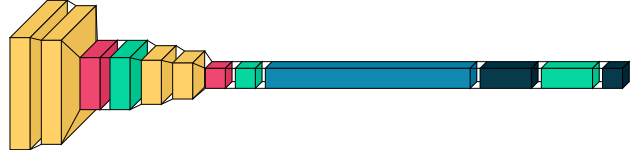

In [114]:
visualkeras.layered_view(model)

In [3]:
model = tf.keras.models.load_model("./Models/traffic_sign.h5")

## Predicting signs (Testing the model)

Class Id of image:  14


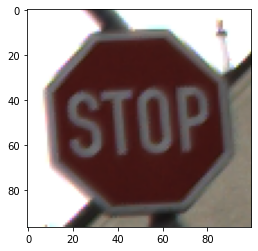

In [155]:
#image from test database

image = Image.open('D:/Internship/Anemoi_Technologies/Training/Data/' + img_test[93])
img = image.resize((32,32))
img = np.array(img)/255
img = img.reshape(1,32,32,3)
print("Class Id of image: ", labels_test[93])
plt.imshow(image)

In [156]:
# Prediction of this image
pred = model.predict_classes(img)[0]
print("Class Id of image: ",pred)
sign = classes_dict[pred]
print("Predicted Traffic sign: ",sign)

Class Id of image:  14
Predicted Traffic sign:  Stop


Class Id of image:  25
Predicted Traffic sign:  Road work


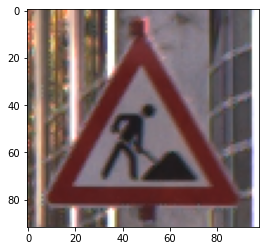

In [154]:
#image from external source

image = Image.open('C:/Users/saumy/Desktop/pic1.png')
img = image.resize((32,32))
img = np.array(img)/255
img = img.reshape(1,32,32,3)
plt.imshow(image)
# Prediction of this image
pred = model.predict_classes(img)[0]
print("Class Id of image: ",pred)
sign = classes_dict[pred]
print("Predicted Traffic sign: ",sign)

Class Id of image:  14
Predicted Traffic sign:  Stop


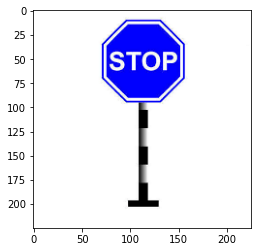

In [157]:
#image from external sourse

#reshaping, and resiszing the image
# data =[]
image = cv2.imread('C:/Users/saumy/Desktop/pic2.png')
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((32, 32))
# data.append(np.array(resize_image))
img = resize_image.resize((32,32))
img = np.array(img)/255
img = img.reshape(1,32,32,3)
plt.imshow(image)
# Prediction of this image
pred = model.predict_classes(img)[0]
print("Class Id of image: ",pred)
sign = classes_dict[pred]
print("Predicted Traffic sign: ",sign)

Class Id of image:  27
Predicted Traffic sign:  Pedestrians


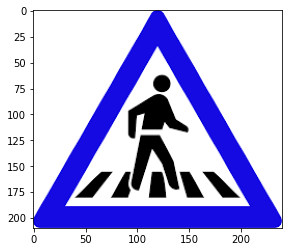

In [146]:
#image from external sourse

#reshaping, and resiszing the image
# data =[]
image = cv2.imread('C:/Users/saumy/Desktop/download.png')
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((32, 32))
# data.append(np.array(resize_image))
img = resize_image.resize((32,32))
img = np.array(img)/255
img = img.reshape(1,32,32,3)
plt.imshow(image)
# Prediction of this image
pred = model.predict_classes(img)[0]
print("Class Id of image: ",pred)
sign = classes_dict[pred]
print("Predicted Traffic sign: ",sign)

Class Id of image:  28
Predicted Traffic sign:  Children crossing


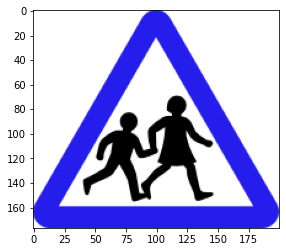

In [153]:
#image from external sourse

#reshaping, and resiszing the image
# data =[]
image = cv2.imread('C:/Users/saumy/Desktop/pic3.png')
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((32, 32))
# data.append(np.array(resize_image))
img = resize_image.resize((32,32))
img = np.array(img)/255
img = img.reshape(1,32,32,3)
plt.imshow(image)
# Prediction of this image
pred = model.predict_classes(img)[0]
print("Class Id of image: ",pred)
sign = classes_dict[pred]
print("Predicted Traffic sign: ",sign)